## Linear Regression


In [1]:
import pandas as pd

df = pd.read_csv("processed_kaggle_data.csv")
df.head()

,Test_Name,Topic_Area,Question_Text,Options_Count,Question_Length_Words,Readability_Grade,Requires_Calculator,Difficulty_Level
0,SAT Math,Algebra,A function f(x) is defined by f(x)=2x2+7. What...,4,13,1.468077,1,Hard
1,GRE Verbal,Reading Comprehension,"Called by some the island that time forgot, ...",5,252,10.512857,0,Hard
2,ACT,Maths,"Cameron took 4 tests, and his scores were as f...",4,40,2.470000,1,Easy
3,GMAT,Data Insights,What number is 15 percent of x ?\n(1) 18 is 6 ...,4,21,0.580000,0,Easy
4,SAT Math,Advanced Math,What is the next-highest prime number after 67,4,8,5.230000,1,Easy


In [2]:
mapping = {'Easy': 1, 'Moderate': 2, 'Hard': 3}
df['Difficulty_num'] = df['Difficulty_Level'].map(mapping)

df['Difficulty_num'].unique()


array([3, 1, 2], dtype=int64)

In [3]:
X = df[['Test_Name', 'Topic_Area', 'Options_Count',
        'Question_Length_Words', 'Readability_Grade', 'Requires_Calculator']]

y = df['Difficulty_num']


In [4]:
cat_cols = ['Test_Name', 'Topic_Area']
num_cols = ['Options_Count', 'Question_Length_Words', 'Readability_Grade', 'Requires_Calculator']


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Test_Name', 'Topic_Area']),
                                                 ('num', 'passthrough',
                                                  ['Options_Count',
                                                   'Question_Length_Words',
                                                   'Readability_Grade',
                                                   'Requires_Calculator'])])),
                ('regressor', LinearRegression())])

In [9]:
y_pred = model.predict(X_test)
list(zip(y_test.tolist(), y_pred.round(2).tolist()))[:10]


[(2, 1.59),
 (1, 1.06),
 (2, 1.52),
 (3, 2.62),
 (2, 2.22),
 (1, 1.66),
 (2, 1.72),
 (2, 2.09),
 (2, 2.4),
 (3, 1.81)]

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.522843569342726, 0.6410218181884306, -0.060410248757681195)

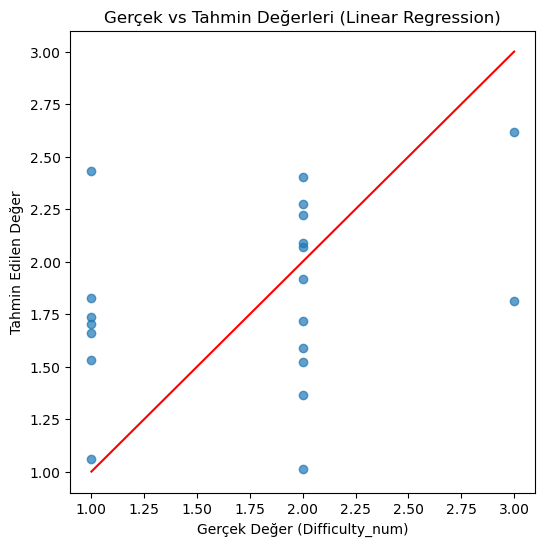

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Gerçek Değer (Difficulty_num)")
plt.ylabel("Tahmin Edilen Değer")
plt.title("Gerçek vs Tahmin Değerleri (Linear Regression)")
plt.plot([1,3], [1,3], color='red')  
plt.show()


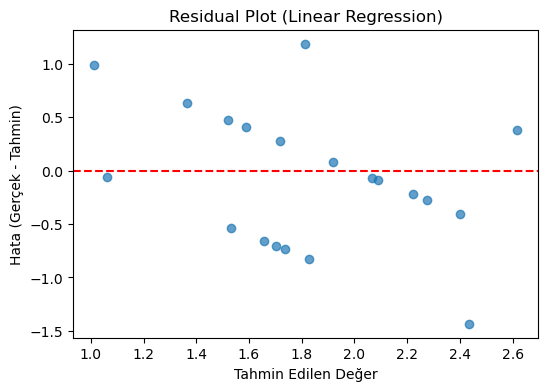

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Hata (Gerçek - Tahmin)")
plt.title("Residual Plot (Linear Regression)")
plt.show()


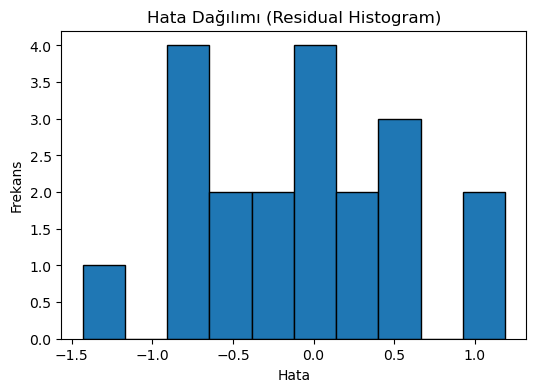

In [13]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=10, edgecolor='black')
plt.title("Hata Dağılımı (Residual Histogram)")
plt.xlabel("Hata")
plt.ylabel("Frekans")
plt.show()


## Logistic Regression

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Difficulty_label'] = le.fit_transform(df['Difficulty_Level'])

df[['Difficulty_Level', 'Difficulty_label']].head()
X = df[['Test_Name', 'Topic_Area', 'Options_Count',
        'Question_Length_Words', 'Readability_Grade', 'Requires_Calculator']]

y = df['Difficulty_label']


,Difficulty_Level,Difficulty_label
0,Hard,1
1,Hard,1
2,Easy,0
3,Easy,0
4,Easy,0


In [15]:
X = df[['Test_Name', 'Topic_Area', 'Options_Count',
        'Question_Length_Words', 'Readability_Grade', 'Requires_Calculator']]

y = df['Difficulty_label']


In [16]:
cat_cols = ['Test_Name', 'Topic_Area']
num_cols = ['Options_Count', 'Question_Length_Words', 'Readability_Grade', 'Requires_Calculator']


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
log_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=3000, solver="lbfgs"))
])



In [24]:
log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Test_Name', 'Topic_Area']),
                                                 ('num', 'passthrough',
                                                  ['Options_Count',
                                                   'Question_Length_Words',
                                                   'Readability_Grade',
                                                   'Requires_Calculator'])])),
                ('classifier', LogisticRegression(max_iter=3000))])

In [25]:
y_pred = log_model.predict(X_test)
list(zip(y_test.tolist(), y_pred.tolist()))[:10]


[(2, 0),
 (0, 0),
 (2, 2),
 (1, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 0)]

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
[[1 1 5]
 [1 0 1]
 [2 0 9]]
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.00      0.00      0.00         2
           2       0.60      0.82      0.69        11

    accuracy                           0.50        20
   macro avg       0.28      0.32      0.29        20
weighted avg       0.42      0.50      0.44        20



<Figure size 600x400 with 0 Axes>

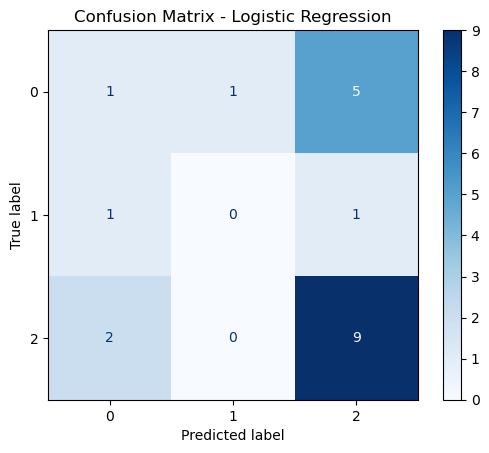

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])


In [29]:
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Test_Name', 'Topic_Area']),
                                                 ('num', 'passthrough',
                                                  ['Options_Count',
                                                   'Question_Length_Words',
                                                   'Readability_Grade',
                                                   'Requires_Calculator'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [30]:
rf_pred = rf_model.predict(X_test)
list(zip(y_test.tolist(), rf_pred.tolist()))[:10]


[(2, 2),
 (0, 0),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 2)]

In [31]:
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


RF Accuracy: 0.55
[[2 0 5]
 [0 0 2]
 [2 0 9]]
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.00      0.00      0.00         2
           2       0.56      0.82      0.67        11

    accuracy                           0.55        20
   macro avg       0.35      0.37      0.34        20
weighted avg       0.48      0.55      0.49        20



C:\Users\elifk\anaconda3\of\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elifk\anaconda3\of\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elifk\anaconda3\of\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 600x400 with 0 Axes>

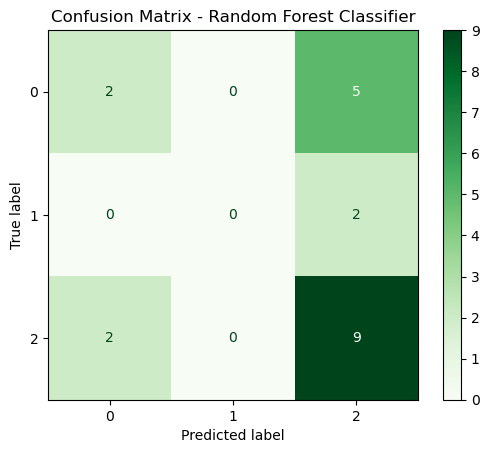

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


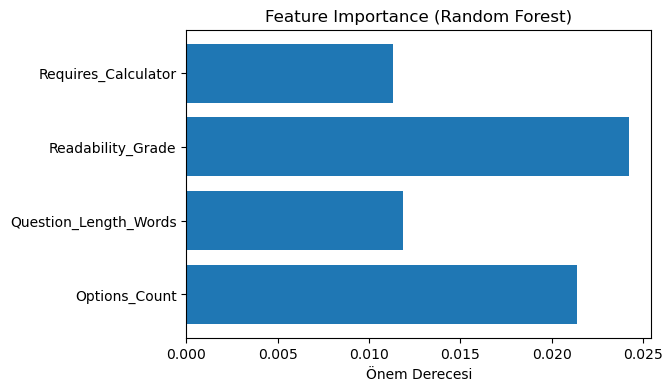

In [33]:
rf = rf_model.named_steps['classifier']
feature_names = num_cols  

importances = rf.feature_importances_[:len(feature_names)]

plt.figure(figsize=(6,4))
plt.barh(feature_names, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Önem Derecesi")
plt.show()


## EDA

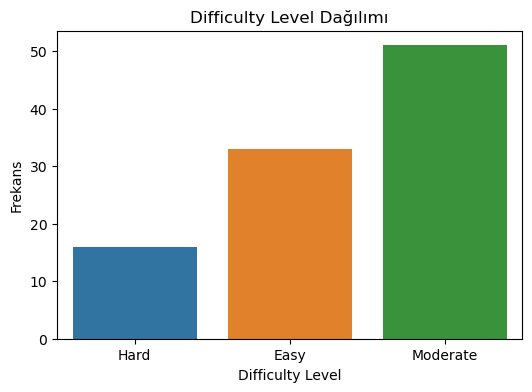

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df['Difficulty_Level'])
plt.title("Difficulty Level Dağılımı")
plt.xlabel("Difficulty Level")
plt.ylabel("Frekans")
plt.show()


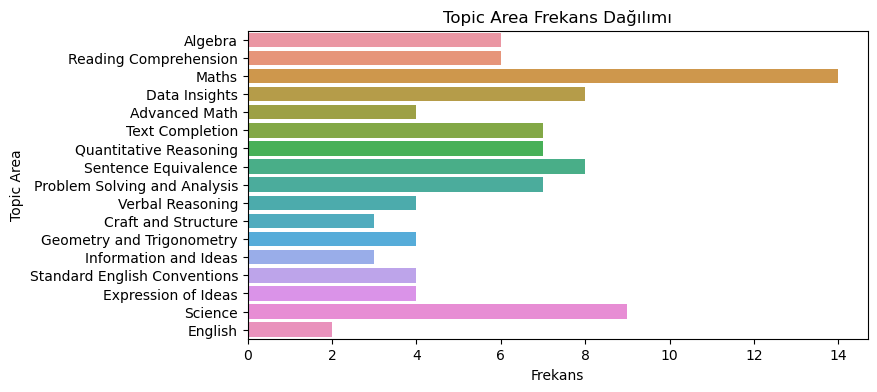

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['Topic_Area'])
plt.title("Topic Area Frekans Dağılımı")
plt.xlabel("Frekans")
plt.ylabel("Topic Area")
plt.show()


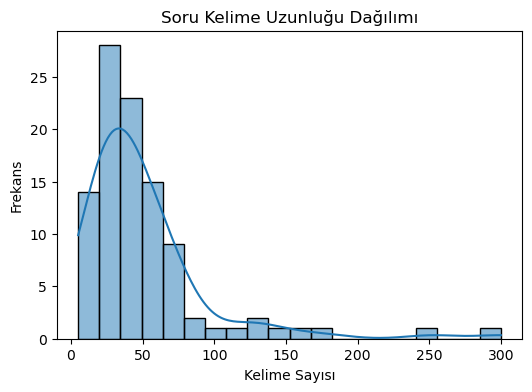

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df['Question_Length_Words'], bins=20, kde=True)
plt.title("Soru Kelime Uzunluğu Dağılımı")
plt.xlabel("Kelime Sayısı")
plt.ylabel("Frekans")
plt.show()


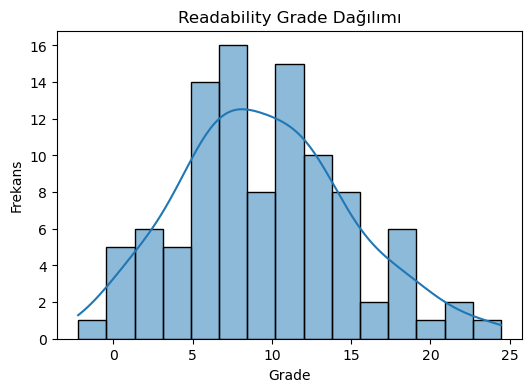

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df['Readability_Grade'], bins=15, kde=True)
plt.title("Readability Grade Dağılımı")
plt.xlabel("Grade")
plt.ylabel("Frekans")
plt.show()
